In [1]:
%matplotlib inline
import qinfer as qi
import qutip as qt
import numpy as np
import scipy as sp
import math as mth
from IPython.display import display, Math, Latex
from functools import partial
import matplotlib.pyplot as plt

In [18]:
import datetime
import os as os
import time as time
import pandas as pd

In [3]:
import importlib as imp

In [4]:
import logging as logging
import warnings as warnings
import sys

%run LoggingCode.py

Importing Local Function for Hamiltonian learning

In [5]:
# Add personalized library to PYTHONPATH
sys.path.append(os.path.join("..","Libraries","QML_lib"))

In [6]:
from Norms import *
from IOfuncts import *
from EvalLoss import *

import ProbeStates as pros
import multiPGH as mpgh
import GenSimQMD_IQLE as gsi
import Evo as evo

In [7]:
""" filter only the Weight Clipping warning """
#SET LEVEL WARNINGS TO 0 In FINAL VERSION
warnings.filterwarnings("ignore", message='Negative weights occured', category=RuntimeWarning)

# Model learning functions


#ChosenOpList = np.array([evo.sigmaz(), evo.sigmax()])


TrueOpList is the array of the Operators which compose the TRUE Hamiltonian  of the system
TrueParams (array) are the corresponding True values which together with OpList let us write the true Hamiltonian of the system

Hsys= Sum TrueOpList[i].TrueParams[i]


SimParams list of parameters tried for the simulator which will be used as centre of the distribution for the particles
OpList list of the operators tried for the quantum simulator i.e. of the model we are testing

Hsim= Sum OpList[i].SimParams[i]

Particles is the array with all the particles contained in this model, each element of this array is an array
with length equal to the number of operators/Trueparams in the Hamiltonian

Weights are the weights of the particles
    
BayesFactorList is the list with all the BayesFactors of this model
    
VolumeList array containing Volume vs number of experiments
    
NumParticles is the number of particles

    

In [8]:
lst = [evo.sigmax(),evo.sigmay(), evo.sigmaz()]     

In [9]:
import Utils as uti
import Models as mods
import BayesF as bayf
import ModLearn as mdl
import QMD as qmd
import QML as qml

## Reload when needed

In [10]:
imp.reload(pros)
imp.reload(mpgh)
imp.reload(gsi)
imp.reload(evo)
imp.reload(mdl)
imp.reload(uti)
imp.reload(mods)
imp.reload(bayf)
imp.reload(qmd)
imp.reload(qml)

<module 'QML' from '..\\Libraries\\QML_lib\\QML.py'>

# MODEL LEARNING TEST

In [41]:
df2 = pd.DataFrame({ 'N_params' : 1., 'Origin_Model' : 'foo', 'Discarded' : False, 'LogL_Red' : 0., 'LogL_Ext' : 0., 'Origin_epoch' : np.inf, 'Layer_Champ' : False}, index=modeltest.ModelNames)
df2

,Discarded,Layer_Champ,LogL_Ext,LogL_Red,N_params,Origin_Model,Origin_epoch
sx_,False,False,0.0,0.0,1.0,foo,inf
sy_,False,False,0.0,0.0,1.0,foo,inf
sz_,False,False,0.0,0.0,1.0,foo,inf
sx_sy_,False,False,0.0,0.0,1.0,foo,inf
sz_sx_,False,False,0.0,0.0,1.0,foo,inf
sz_sy_,False,False,0.0,0.0,1.0,foo,inf
sz_sx_sy_,False,False,0.0,0.0,1.0,foo,inf


In [38]:
len(df2.index)

7

In [14]:
modeltest = qmd.ModelsDevelopmentClass(7, lst)

#print(modeltest.TrueOpList)
print(uti.ModelNamesPauli([modeltest.TrueOpList], uti.PauliNames() ) )

['sx_sy_']


In [12]:
uti.PossibleOPListCombGen(lst)

[array([[[ 0.+0.j,  1.+0.j],
         [ 1.+0.j,  0.+0.j]]]), array([[[ 0.+0.j, -0.-1.j],
         [ 0.+1.j,  0.+0.j]]]), array([[[ 1.+0.j,  0.+0.j],
         [ 0.+0.j, -1.+0.j]]]), array([[[ 0.+0.j,  1.+0.j],
         [ 1.+0.j,  0.+0.j]],
 
        [[ 0.+0.j, -0.-1.j],
         [ 0.+1.j,  0.+0.j]]]), array([[[ 0.+0.j,  1.+0.j],
         [ 1.+0.j,  0.+0.j]],
 
        [[ 1.+0.j,  0.+0.j],
         [ 0.+0.j, -1.+0.j]]]), array([[[ 0.+0.j, -0.-1.j],
         [ 0.+1.j,  0.+0.j]],
 
        [[ 1.+0.j,  0.+0.j],
         [ 0.+0.j, -1.+0.j]]]), array([[[ 0.+0.j,  1.+0.j],
         [ 1.+0.j,  0.+0.j]],
 
        [[ 0.+0.j, -0.-1.j],
         [ 0.+1.j,  0.+0.j]],
 
        [[ 1.+0.j,  0.+0.j],
         [ 0.+0.j, -1.+0.j]]])]

In [17]:
modeltest.ModelNames

['sx_', 'sy_', 'sz_', 'sx_sy_', 'sz_sx_', 'sz_sy_', 'sz_sx_sy_']

In [13]:
uti.ModelNamesPauli(uti.PossibleOPListCombGen(lst), uti.PauliNames() )

['sx_', 'sy_', 'sz_', 'sx_sy_', 'sz_sx_', 'sz_sy_', 'sz_sx_sy_']

In [336]:
#modeltest.ModsOpList

In [337]:
print('ModelNames: ' + repr(modeltest.ModelNames))
#print('ModelDict: ' + repr(modeltest.ModelDict))

ModelNames: ['sx_', 'sy_', 'sz_', 'sx_sy_', 'sx_sz_', 'sy_sz_', 'sx_sy_sz_']


In [338]:
modeltest.InitiliaseAllModels()

[[ 0.8316297]]
Initialization Ready
[[ 0.63515069]]
Initialization Ready
[[ 0.09303958]]
Initialization Ready
[[ 0.81435313  0.54254505]]
Initialization Ready
[[ 0.55848916  0.38314459]]
Initialization Ready
[[ 0.47626686  0.80897928]]
Initialization Ready
[[ 0.97459419  0.26016769  0.33791301]]
Initialization Ready


In [339]:
modeltest.TrueParamsList

array([[ 0.65284952,  0.1600037 ,  0.43479954]])

In [340]:
start=time.clock()
modeltest.UpdateAllModels(expnum=50)
end=time.clock()
print('Total elapsed time: ' + str(end-start))

Initial time selected > 0.84381157379
Final time selected > 15.3879595788
Final Parameters mean and stdev:[-0.45829762  0.2881304 ]
True parameters were: [[ 0.65284952  0.1600037   0.43479954]]
Single iteration 0 elapsed time: 7.771382762690337
Initial time selected > 1.39809017986
Final time selected > 17.7870706672
Final Parameters mean and stdev:[ 0.84050945  0.04703893]
True parameters were: [[ 0.65284952  0.1600037   0.43479954]]
Single iteration 1 elapsed time: 7.698816208783683
Initial time selected > 0.663206894421
Final time selected > 133.774049456
Final Parameters mean and stdev:[ 0.31071164  0.01717101]
True parameters were: [[ 0.65284952  0.1600037   0.43479954]]
Single iteration 2 elapsed time: 11.753839094706564
Initial time selected > 0.50089138627
Final time selected > 0.777328131162
Final Parameters mean and stdev:[ 0.78203077  0.16154358]
Final Parameters mean and stdev:[ 0.38521679  0.25609105]
True parameters were: [[ 0.65284952  0.1600037   0.43479954]]
Single ite

In [342]:
for i in range(len(modeltest.ModelsList)):
    print(modeltest.ModelsList[i].NewEval)

[-0.40956735]
[ 0.8427475]
[ 0.3123566]
[ 0.77988121  0.38389286]
[ 0.67259184  0.5038776 ]
[ 0.4807549  0.2080327]
[ 1.12172101  0.40139666  1.0241254 ]


In [343]:
print(uti.ModelNamesPauli([modeltest.TrueOpList], uti.PauliNames() ) )

['sx_sy_sz_']


In [344]:
tpool = modeltest.DataPool(20)

In [345]:
start=time.clock()
modeltest.UpdateAllLogLikelihoods(tpool)
end=time.clock()
print('Total elapsed time: ' + str(end-start))

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.5827715076778985). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0005761297389195). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.066873647158444). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.982791413945037). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.246317083637001). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.515568191874368). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.0209665695567045). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time: 131.2064023645362


In [346]:
modeltest.ComputeAllBayesFactors(fromLogL = True)

{"['sx_']VS['sx_sy_']": 2.980513866424324,
 "['sx_']VS['sx_sy_sz_']": 1.9317880628477724e-14,
 "['sx_']VS['sx_sz_']": 1.1106671138350066e-12,
 "['sx_']VS['sy_']": 50850899.74096825,
 "['sx_']VS['sy_sz_']": 0.0,
 "['sx_']VS['sz_']": 1.3999505712347649e-05,
 "['sx_sy_']VS['sx_']": 0.33551261454109071,
 "['sx_sy_']VS['sx_sy_sz_']": 6.4392935428259079e-15,
 "['sx_sy_']VS['sx_sz_']": 3.7259084706420253e-13,
 "['sx_sy_']VS['sy_']": 17061118.323859129,
 "['sx_sy_']VS['sy_sz_']": 0.0,
 "['sx_sy_']VS['sz_']": 4.6970107638877323e-06,
 "['sx_sy_sz_']VS['sx_']": 51835415001430.734,
 "['sx_sy_sz_']VS['sx_sy_']": 154496173183623.72,
 "['sx_sy_sz_']VS['sx_sz_']": 57.571016292715967,
 "['sx_sy_sz_']VS['sy_']": 2.6358774912692362e+21,
 "['sx_sy_sz_']VS['sy_sz_']": 6.6613381477509392e-16,
 "['sx_sy_sz_']VS['sz_']": 725670188.41657698,
 "['sx_sz_']VS['sx_']": 900373457676.63794,
 "['sx_sz_']VS['sx_sy_']": 2683575575565.6333,
 "['sx_sz_']VS['sx_sy_sz_']": 0.017369851435582895,
 "['sx_sz_']VS['sy_']": 4.57

In [302]:
list(map(lambda ids: modeltest.ModelsList[ids].KLogTotLikelihood, range(6)))

[-49.114753894022677,
 -57.576810224985351,
 -132.2687687385353,
 -92.422529602848499,
 -100.29012821688582,
 -99.386853620778354]

In [296]:
volume_list = modeltest.ModelsList[5].VolumeList

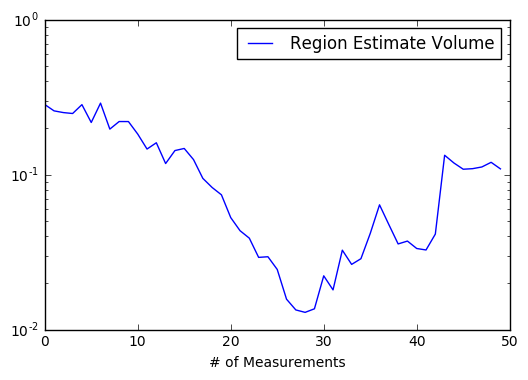

In [297]:
plt.semilogy(volume_list, label='Region Estimate Volume')
plt.legend()
plt.xlabel('# of Measurements')

plt.show()

In [229]:
volume_data = volume_list[0:20]
slope = np.polyfit(range(len(volume_data)), volume_data, deg=1)[0]
volume_data_flatten = volume_data  - slope*range(len(volume_data))
noise = np.std(volume_data_flatten)
print(slope)
print(noise)

0.0342514142866
0.108052435407


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


## Preliminary trials

In [27]:
tpool = modeltest.DataPool(10)

In [33]:
idMod=3

mymodel = modeltest.ModelsList[idMod]

mytpool = np.empty(0)
for j in range( len(tpool) ):
    if idMod is not j:
        mytpool=np.append(mytpool, tpool[j])
print('mytpool len: ', len(mytpool))
mytpool

mytpool len:  60


array([  3.56836995e-01,   1.58083401e+00,   1.09448136e+00,
         1.86424750e+00,   3.57263671e-01,   1.42073129e+00,
         5.29827653e-01,   1.20131291e+00,   8.55761623e-01,
         1.72847692e+00,   2.64867230e+02,   3.19450833e+02,
         1.13337158e+03,   1.54666241e+02,   1.31289569e+03,
         9.10214242e+02,   4.02381052e+02,   8.83574274e+02,
         7.75353685e+03,   2.84264037e+03,   1.71698284e+02,
         6.53238557e+01,   2.73964323e+02,   6.66713766e+02,
         1.76138709e+02,   3.66000634e+02,   1.15482096e+03,
         3.45467819e+03,   3.95268035e+04,   7.40191641e+02,
         7.33844757e+01,   2.16545898e+02,   4.49400050e+01,
         7.63788501e+01,   3.16963256e+02,   3.33724672e+01,
         5.26799673e+01,   5.25487900e+01,   4.91751693e+02,
         8.48642342e+01,   1.73361067e+02,   6.74491520e+02,
         2.16729790e+02,   2.99624902e+02,   7.71997715e+02,
         3.02992719e+02,   2.51454786e+02,   6.19146652e+02,
         8.39861351e+02,

In [34]:
"""This can be adopted alternatively to sample the frequencies"""
#myexperiments = np.array(list(map(lambda x: Kmodel.Heuristic(), range(len(tpool))) ) )

myexperiments = np.empty((len(mytpool), ), dtype=mymodel.GenSimModel.expparams_dtype)       #initialises the experiments to perform for the update

myexperiments['t']  = mytpool

In [35]:
myexperiments

array([(0.35683699543121394, 9.46765942e-315, 6.917e-321),
       (1.5808340135250298, 0.6154953177229143, 0.0),
       (1.0944813590553506, 8.60973318409419e-67, 9.462515493683218e-96),
       (1.864247502033219, 5.937421302973274e-38, 5.981490944369225e-154),
       (0.3572636712171276, 7.128903417486503e-67, 2.2137974609192766e-52),
       (1.4207312855098175, 3.221777067163919e-57, 2.440043148419846e-154),
       (0.5298276533358683, 1.7973950845951164e-52, 1.6584870046017555e-76),
       (1.2013129096038775, 4.0139765785239013e-57, 1.1447266613021176e-259),
       (0.8557616232532389, 8.238801249426261e-67, 8.232977426101218e-67),
       (1.728476919127297, 3.507440597248618e-33, 5.90255903737772e-96),
       (264.86723025964, 4.6569859217993704e-33, 1.0860392870200448e-42),
       (319.45083288907455, 8.230073927580902e-67, 3.856824477342548e-110),
       (1133.3715763774308, 1.0289754681224096e-71, 2.175299784204236e-76),
       (154.66624113126255, 8.230073927580902e-67, 3.8568

In [ ]:
myexperiments[field_i]

In [43]:
inv_field = [item[0] for item in mymodel.GenSimModel.expparams_dtype[1:] ]
print('inv_field: ', inv_field)
for i in range(len(inv_field)):
    myexperiments[inv_field[i]] = mymodel.NewEval[i]
print(myexperiments)

inv_field:  ['w_1', 'w_2']
[(0.35683699543121394, 0.4867189654629474, 0.728015489734225)
 (1.5808340135250298, 0.4867189654629474, 0.728015489734225)
 (1.0944813590553506, 0.4867189654629474, 0.728015489734225)
 (1.864247502033219, 0.4867189654629474, 0.728015489734225)
 (0.3572636712171276, 0.4867189654629474, 0.728015489734225)
 (1.4207312855098175, 0.4867189654629474, 0.728015489734225)
 (0.5298276533358683, 0.4867189654629474, 0.728015489734225)
 (1.2013129096038775, 0.4867189654629474, 0.728015489734225)
 (0.8557616232532389, 0.4867189654629474, 0.728015489734225)
 (1.728476919127297, 0.4867189654629474, 0.728015489734225)
 (264.86723025964, 0.4867189654629474, 0.728015489734225)
 (319.45083288907455, 0.4867189654629474, 0.728015489734225)
 (1133.3715763774308, 0.4867189654629474, 0.728015489734225)
 (154.66624113126255, 0.4867189654629474, 0.728015489734225)
 (1312.8956920887006, 0.4867189654629474, 0.728015489734225)
 (910.2142421090025, 0.4867189654629474, 0.728015489734225)
 (

In [47]:
mysimparams = mymodel.SimParams

mydata = mymodel.GenSimModel.simulate_experiment(mymodel.SimParams, myexperiments)[0][0]

Kupdater=mymodel.Updater
Kupdater.batch_update(mydata, myexperiments, resample_interval=100)

LogLikelihood = np.sum(Kupdater.log_total_likelihood)

# MULTIPLE testing running

In [10]:
nruns = 100
pool_len = 50

collectTrueOpList = []
collectTrueNames = []
collectTrueParams = []

collectEstimParams = []

collectKfactorsDict = []
collectLogL = []


for run in range(nruns):
    modeltest = qmd.ModelsDevelopmentClass(7, lst)
    collectTrueOpList.append(modeltest.TrueOpList)
    collectTrueNames.append(modeltest.TrueNames)
    
    modeltest.InitiliaseAllModels()
    
    collectTrueParams.append(modeltest.TrueParamsList)
    
    start=time.clock()
    modeltest.UpdateAllModels(expnum=350)
    end=time.clock()
    print('Total elapsed time for the learning process: ' + str(end-start))
    
    
    collectEstimParams.append([modeltest.ModelsList[i].NewEval for i in range(len(modeltest.ModelsList)) ])
    
    tpool = modeltest.DataPool(pool_len)
    
    start=time.clock()
    modeltest.UpdateAllLogLikelihoods(tpool)
    end=time.clock()
    print('Total elapsed time for Bayes factor update: ' + str(end-start))
    
    collectKfactorsDict.append(modeltest.ComputeAllBayesFactors(fromLogL = True))
    
    collectLogL.append([modeltest.ModelsList[i].KLogTotLikelihood for i in range(len(modeltest.ModelsList)) ])
    

[[ 0.5860098]]
Initialization Ready
[[ 0.15836811]]
Initialization Ready
[[ 0.4279087]]
Initialization Ready
[[ 0.15672626  0.97625095]]
Initialization Ready
[[ 0.46922643  0.24787462]]
Initialization Ready
[[ 0.6439683   0.20564304]]
Initialization Ready
[[ 0.63293011  0.85017443  0.10804446]]
Initialization Ready
Initial time selected > 1.29106627735
Final time selected > 1.40759000391
Final Parameters mean and stdev:[-0.01985354  0.51262223]
True model was: [[[ 0.+0.j  1.+0.j]
  [ 1.+0.j  0.+0.j]]

 [[ 0.+0.j -0.-1.j]
  [ 0.+1.j  0.+0.j]]

 [[ 1.+0.j  0.+0.j]
  [ 0.+0.j -1.+0.j]]]
True parameters were: [[ 0.43405429  0.77906936  0.83532925]]
Single iteration 0 elapsed time: 52.20132462257923
Initial time selected > 6.72291585205
Final time selected > 1284.91366825
Exiting learning for Reaching Cov. Norm. Thrshold of 4.24891691164e-07
 at Iteration Number 188
Final Parameters mean and stdev:[  1.67007387e+00   6.51837166e-04]
True model was: [[[ 0.+0.j  1.+0.j]
  [ 1.+0.j  0.+0.j]]



KeyboardInterrupt: 

In [25]:
modeltest = qmd.ModelsDevelopmentClass(7, lst)
modeltest.TrueParamsList

array([[ 0.50250749]])

## Data export

In [ ]:
import pickle
PIK = "testQMD_pool"+str(pool_len)+".dat"

In [514]:
data = [collectTrueOpList, collectTrueNames, collectTrueParams, collectEstimParams, collectKfactorsDict, collectLogL]
with open(PIK, "wb") as f:
    pickle.dump(data, f)

## Data import

In [728]:
import pickle
pool_len = 20
PIK = "testQMD_pool"+str(pool_len)+".dat"

with open(PIK, "rb") as f:
    dataold = pickle.load(f)

## Step-by-step checking

In [413]:
print('ModelNames: ' + repr(modeltest.ModelNames))

ModelNames: ['sx_', 'sy_', 'sz_', 'sy_sx_', 'sz_sx_', 'sy_sz_', 'sy_sz_sx_']


In [414]:
ids = 99
print("True model: " + repr(collectTrueNames[ids][0]))

True model: 'sz_sx_'


In [409]:
print("Best model found: " + repr(modeltest.ModelNames[np.argmax(np.array(collectLogL[ids]))]) )

Best model found: 'sy_sz_'


In [353]:
collectTrueParams[ids]

array([[ 0.63612677,  0.41478088]])

In [163]:
evo.getH(collectTrueParams[ids], collectTrueOpList[ids])

array([[ 0.18774291+0.j        ,  0.00000000-0.46414783j],
       [ 0.00000000+0.46414783j, -0.18774291+0.j        ]])

In [203]:
collectLogL[ids]

[-356.34959552749945,
 -309.98335005268302,
 -329.44589238992444,
 -371.01231960058362,
 -266.04046756817871,
 -109.89148827249306,
 -304.02204699679373]

In [165]:
collectKfactorsDict[ids]

{"['sx_']VS['sy_']": 2.466545003709314e+50,
 "['sx_']VS['sy_sx_']": 0.0,
 "['sx_']VS['sy_sz_']": 1.1102230246251565e-16,
 "['sx_']VS['sy_sz_sx_']": 1.2325626075337937e-09,
 "['sx_']VS['sz_']": 1437094397674.96,
 "['sx_']VS['sz_sx_']": 1.0136122796027082e+43,
 "['sy_']VS['sx_']": 0.0,
 "['sy_']VS['sy_sx_']": 0.0,
 "['sy_']VS['sy_sz_']": 0.0,
 "['sy_']VS['sy_sz_sx_']": 0.0,
 "['sy_']VS['sz_']": 0.0,
 "['sy_']VS['sz_sx_']": 4.1094416647347032e-08,
 "['sy_sx_']VS['sx_']": 8.2851831811340211e+37,
 "['sy_sx_']VS['sy_']": 2.0435777180242562e+88,
 "['sy_sx_']VS['sy_sz_']": 9.5849849787552692e+21,
 "['sy_sx_']VS['sy_sz_sx_']": 1.021200708430138e+29,
 "['sy_sx_']VS['sz_']": 1.1906590333318505e+50,
 "['sy_sx_']VS['sz_sx_']": 8.3979634111552724e+80,
 "['sy_sz_']VS['sx_']": 8643918795384441.0,
 "['sy_sz_']VS['sy_']": 2.1320614717224526e+66,
 "['sy_sz_']VS['sy_sx_']": 0.0,
 "['sy_sz_']VS['sy_sz_sx_']": 10654171.192689272,
 "['sy_sz_']VS['sz_']": 1.2422127274804269e+28,
 "['sy_sz_']VS['sz_sx_']": 8.7

### applying directly the champion rule as the highest BayesFactor

In [417]:
performance = []
for ids in range(100):
    performance.append(collectTrueNames[ids][0]==modeltest.ModelNames[np.argmax(np.array(collectLogL[ids]))])
print("Correctly estimated model in " + str(100*sum(performance)/len(performance)) + "% of cases")

Correctly estimated model in 64.0% of cases


### tournament rule among Bayes Factors

In [610]:
prolst=np.arange(len(modeltest.ModsOpList))

prooutlst = np.empty(0)
for i in range(len(prolst)):
    for j in range(len(prolst)):
        if i is not j:
            prooutlst = np.append(prooutlst, np.array([prolst[i],prolst[j]]) )
prooutlst

array([ 0.,  1.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  5.,  0.,  6.,  1.,
        0.,  1.,  2.,  1.,  3.,  1.,  4.,  1.,  5.,  1.,  6.,  2.,  0.,
        2.,  1.,  2.,  3.,  2.,  4.,  2.,  5.,  2.,  6.,  3.,  0.,  3.,
        1.,  3.,  2.,  3.,  4.,  3.,  5.,  3.,  6.,  4.,  0.,  4.,  1.,
        4.,  2.,  4.,  3.,  4.,  5.,  4.,  6.,  5.,  0.,  5.,  1.,  5.,
        2.,  5.,  3.,  5.,  4.,  5.,  6.,  6.,  0.,  6.,  1.,  6.,  2.,
        6.,  3.,  6.,  4.,  6.,  5.])

In [611]:
modelNames = modeltest.ModelNames
modelNames

['sx_', 'sy_', 'sz_', 'sy_sx_', 'sz_sx_', 'sy_sz_', 'sy_sz_sx_']

In [642]:
threshold = 1

def findWinners(modelNames, proBayesFactorsList):
    proBayesFactorNames=[]
    for i in range(int(len(prooutlst)/2)):
        proBayesFactorNames.append("")
        if proBayesFactorsList[i] > threshold:
            proBayesFactorNames[-1]= str(modelNames[int(prooutlst[2*i])])
        elif proBayesFactorsList[i] < 1/threshold:
            proBayesFactorNames[-1]= str(modelNames[int(prooutlst[2*i+1])])
            
    return(proBayesFactorNames)

In [643]:
def ChampbyTourn(modelNames, collectLogL_single):
    proBayesFactorsList=[]
    for i in range(int(len(prooutlst)/2)):
        proBayesFactorsList.append(bayf.BayesFactorfromLogL(collectLogL_single[int(prooutlst[2*i])], collectLogL_single[int(prooutlst[2*i+1])] ))
    
    proBayesFactorNames = findWinners(modelNames, proBayesFactorsList)
    
    wincount = np.array(list((map(lambda testmodel: proBayesFactorNames.count(testmodel),  modeltest.ModelNames))))
    winner = modeltest.ModelNames[np.argmax(wincount)]
    
    return(winner)

In [644]:
performance = []
for ids in range(100):
    performance.append(collectTrueNames[ids][0]== ChampbyTourn(modelNames, collectLogL[ids]) )
print("Correctly estimated model in " + str(100*sum(performance)/len(performance)) + "% of cases")

Correctly estimated model in 64.0% of cases


#### Breakdown of the comparisons

In [718]:
ids = 25

In [719]:
collectTrueNames[ids][0]

'sy_sz_'

In [720]:
modeltest.ModelNames[np.argmax(np.array(collectLogL[ids]))]

'sy_sx_'

In [721]:
ChampbyTourn(modelNames, collectLogL[ids])

'sy_sx_'

In [722]:
proBayesFactorsList=[]
for i in range(int(len(prooutlst)/2)):
    proBayesFactorsList.append(bayf.BayesFactorfromLogL(collectLogL[ids][int(prooutlst[2*i])], collectLogL[ids][int(prooutlst[2*i+1])] ))

proBayesFactorNames = findWinners(modelNames, proBayesFactorsList)
    
wincount = np.array(list((map(lambda testmodel: proBayesFactorNames.count(testmodel),  modeltest.ModelNames))))

wincount

array([ 6,  0,  4, 12,  2, 10,  8])

In [662]:
modelNames

['sx_', 'sy_', 'sz_', 'sy_sx_', 'sz_sx_', 'sy_sz_', 'sy_sz_sx_']

In [663]:
(collectKfactorsDict[ids])

{"['sx_']VS['sy_']": 0.0,
 "['sx_']VS['sy_sx_']": 6.6871167139478769e+45,
 "['sx_']VS['sy_sz_']": 0.0,
 "['sx_']VS['sy_sz_sx_']": 0.0,
 "['sx_']VS['sz_']": 0.034020909321501924,
 "['sx_']VS['sz_sx_']": 0.0,
 "['sy_']VS['sx_']": 3.6125900373512685e+65,
 "['sy_']VS['sy_sx_']": 2.4157811219413252e+111,
 "['sy_']VS['sy_sz_']": 0.0,
 "['sy_']VS['sy_sz_sx_']": 2.0817747791228504e+39,
 "['sy_']VS['sz_']": 1.2290359807648863e+64,
 "['sy_']VS['sz_sx_']": 0.0,
 "['sy_sx_']VS['sx_']": 0.0,
 "['sy_sx_']VS['sy_']": 0.0,
 "['sy_sx_']VS['sy_sz_']": 0.0,
 "['sy_sx_']VS['sy_sz_sx_']": 0.0,
 "['sy_sx_']VS['sz_']": 0.0,
 "['sy_sx_']VS['sz_sx_']": 0.0,
 "['sy_sz_']VS['sx_']": 1.2745003492793297e+94,
 "['sy_sz_']VS['sy_']": 3.5279407187142895e+28,
 "['sy_sz_']VS['sy_sx_']": 8.5227325875982124e+139,
 "['sy_sz_']VS['sy_sz_sx_']": 7.3443780104600535e+67,
 "['sy_sz_']VS['sz_']": 4.3359660813054559e+92,
 "['sy_sz_']VS['sz_sx_']": 1811744.1069892626,
 "['sy_sz_sx_']VS['sx_']": 1.7353414373064039e+26,
 "['sy_sz_s